<a href="https://colab.research.google.com/github/BenUCL/Reef-acoustics-and-AI/blob/main/Boxplot_accuracies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import statistics

In [ ]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


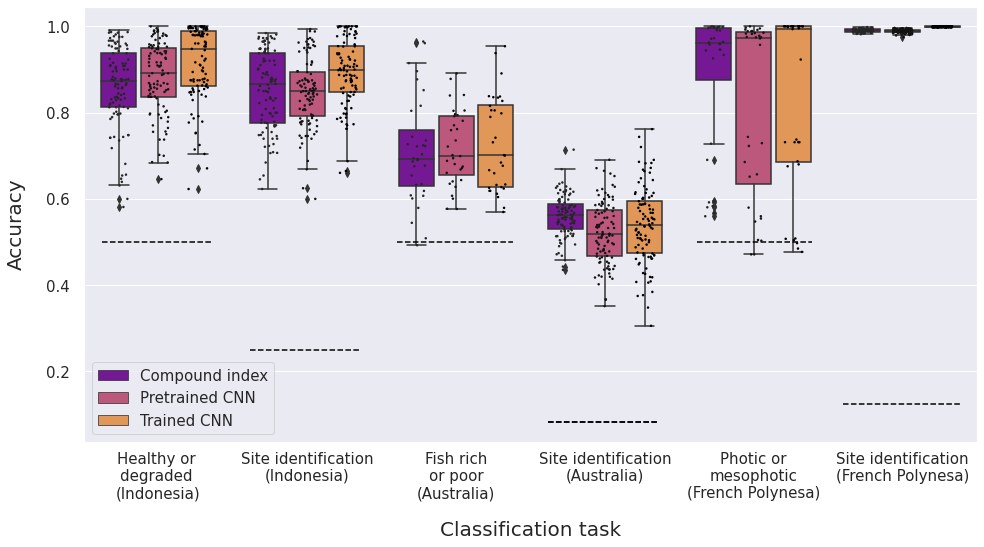

In [ ]:
# create a list of the datasets
habitat_indo = ['Healthy or \ndegraded \n(Indonesia)']*300
site_indo = ['Site identification\n(Indonesia)']*300
habitat_GBR = ['Fish rich\nor poor\n(Australia)']*96
site_GBR = ['Site identification\n(Australia)']*300
habitat_poly = ['Photic or\nmesophotic\n(French Polynesa)']*96
site_poly = ['Site identification\n(French Polynesa)']*300
Dataset =  habitat_indo + site_indo + habitat_GBR + site_GBR + habitat_poly + site_poly #+ coral_cover_indo + site_indo + fish_GBR + site_GBR + coral_cover_indo + site_indo + fish_GBR + site_GBR

# create a list of the methods used
indices = ['Compound index']
pretrained = ['Pretrained CNN']
fullytrained = ['Trained CNN']
Method = (indices*100 + pretrained*100 + fullytrained*100 + 
          indices*100 + pretrained*100 + fullytrained*100 +
          indices*32 + pretrained*32 + fullytrained*32 +
          indices*100 + pretrained*100 + fullytrained*100 +
          indices*32 + pretrained*32  + fullytrained*32 +
          indices*100 + pretrained*100 + fullytrained*100)

# create a list of the results
Accuracy = (Indo_Indices_Habitat + Indo_Pretrained_Habitat + Indo_Fullytrained_Habitat + 
Indo_Indices_Sites + Indo_Pretrained_Sites + Indo_Fullytrained_Sites + 
GBR_Indices_Habitat + GBR_Pretrained_Habitat + GBR_Fullytrained_Habitat +
GBR_Indices_Sites + GBR_Pretrained_Sites + GBR_Fullytrained_Sites + 
Poly_Indices_Habitat + Poly_Pretrained_Habitat + Poly_Fullytrained_Habitat + 
Poly_Indices_Sites + Poly_Pretrained_Sites + Poly_Fullytrained_Sites)

df = pd.DataFrame.from_dict(data = {'Accuracy': Accuracy, 'Dataset': Dataset, 'Method': Method})

fig = plt.figure(figsize=(16, 8))
sns.set(rc={'figure.facecolor':'white'}) #other wise no background col

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#66CDAA","#1E90FF","#FFBBFF"])
# make boxplots
ax = sns.boxplot(x="Dataset", y="Accuracy", hue="Method", data=df, width=0.8, palette="plasma")#["#66CDAA","#4F94CD","#EE82EE"])
adjust_box_widths(fig, 0.9)

# add individual datapoints
ax = sns.stripplot(x="Dataset", y="Accuracy", data=df, color="black", jitter=0.2, size=2.5, hue="Method", dodge = True)

#add line that shows random chance performance
ax.axhline(0.50, ls='--', xmin = 0.02, xmax = 0.142, color = 'black')
ax.axhline(0.25, ls='--', xmin = 0.186, xmax = 0.31, color = 'black')
ax.axhline(0.5, ls='--', xmin = 0.35, xmax = 0.48, color = 'black')
ax.axhline(0.0833, ls='--', xmin = 0.52, xmax = 0.642, color = 'black')
ax.axhline(0.0833, ls='--', xmin = 0.52, xmax = 0.642, color = 'black')
ax.axhline(0.50, ls='--', xmin = 0.686, xmax = 0.815, color = 'black')
ax.axhline(0.125, ls='--', xmin = 0.85, xmax = 0.983, color = 'black')

# Get the handles and labels.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first three elements, so the stripplot points don't get a legend too
l = plt.legend(handles[0:3], labels[0:3], prop={'size': 15})

plt.xlabel('Classification task', size = 20, labelpad=20)
plt.ylabel('Accuracy', size = 20,labelpad=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.rcParams['ytick.major.pad']='8'

plt.show()

In [ ]:
# create a list of the datasets
habitat_indo = ['Healthy or \ndegraded \n(Indonesia)']*300
site_indo = ['Site identification\n(Indonesia)']*300
habitat_GBR = ['Fish rich\nor poor\n(Australia)']*96
site_GBR = ['Site identification\n(Australia)']*300
habitat_poly = ['Photic or\nmesophotic\n(French Polynesa)']*96
site_poly = ['Site identification\n(French Polynesa)']*300
Dataset =  habitat_indo + site_indo + habitat_GBR + site_GBR + habitat_poly + site_poly #+ coral_cover_indo + site_indo + fish_GBR + site_GBR + coral_cover_indo + site_indo + fish_GBR + site_GBR

# create a list of the methods used
indices = ['Compound index']
pretrained = ['Pretrained CNN']
fullytrained = ['Trained CNN']
Method = (indices*100 + pretrained*100 + fullytrained*100 + 
          indices*100 + pretrained*100 + fullytrained*100 +
          indices*32 + pretrained*32 + fullytrained*32 +
          indices*100 + pretrained*100 + fullytrained*100 +
          indices*32 + pretrained*32  + fullytrained*32 +
          indices*100 + pretrained*100 + fullytrained*100)

# create a list of the results
Accuracy = (Indo_Indices_Habitat + Indo_Pretrained_Habitat + Indo_Fullytrained_Habitat + 
Indo_Indices_Sites + Indo_Pretrained_Sites + Indo_Fullytrained_Sites + 
GBR_Indices_Habitat + GBR_Pretrained_Habitat + GBR_Fullytrained_Habitat +
GBR_Indices_Sites + GBR_Pretrained_Sites + GBR_Fullytrained_Sites + 
Poly_Indices_Habitat + Poly_Pretrained_Habitat + Poly_Fullytrained_Habitat + 
Poly_Indices_Sites + Poly_Pretrained_Sites + Poly_Fullytrained_Sites)

df = pd.DataFrame.from_dict(data = {'Accuracy': Accuracy, 'Dataset': Dataset, 'Method': Method})

fig = plt.figure(figsize=(16, 8))
sns.set(rc={'figure.facecolor':'white'}) #other wise no background col

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#66CDAA","#1E90FF","#FFBBFF"])
# make boxplots
ax = sns.boxplot(x="Dataset", y="Accuracy", hue="Method", data=df, width=0.8, palette="plasma")#["#66CDAA","#4F94CD","#EE82EE"])
adjust_box_widths(fig, 0.9)

# add individual datapoints
ax = sns.stripplot(x="Dataset", y="Accuracy", data=df, color="black", jitter=0.2, size=2.5, hue="Method", dodge = True)

# Get the handles and labels.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first three elements, so the stripplot points don't get a legend too
l = plt.legend(handles[0:3], labels[0:3], prop={'size': 15})

plt.xlabel('Classification task', size = 20, labelpad=20)
plt.ylabel('Accuracy', size = 20,labelpad=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.rcParams['ytick.major.pad']='8'

plt.show()

Enter the results variables here (easier than doing above):

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
Indo_Indices_Habitat = [0.68125, 0.6311111111111111, 0.65625, 0.9139072847682119, 0.8587196467991169, 0.9104166666666667, 0.74375, 0.85625, 0.9, 0.9906103286384976, 0.8333333333333334, 0.8675496688741722, 0.8609271523178808, 0.7958333333333333, 0.9668874172185431, 0.9668874172185431, 0.8366445916114791, 0.8729166666666667, 0.8101545253863135, 0.74375, 0.8666666666666667, 0.8354166666666667, 0.8770833333333333, 0.8791666666666667, 0.95625, 0.58125, 0.9, 0.9558498896247241, 0.9598108747044918, 0.90625, 0.8763796909492274, 0.8333333333333334, 0.8166666666666667, 0.98125, 0.8565121412803532, 0.9375, 0.9375, 0.9645833333333333, 0.8444444444444444, 0.7355555555555555, 0.8125, 0.9770833333333333, 0.9155555555555556, 0.7958333333333333, 0.9854166666666667, 0.9533333333333334, 0.8830022075055187, 0.7979166666666667, 0.9229166666666667, 0.9757174392935982, 0.925, 0.9426048565121413, 0.8020833333333334, 0.8777777777777778, 0.9867549668874173, 0.83125, 0.9488888888888889, 0.9139072847682119, 0.7854166666666667, 0.9668874172185431, 0.8211920529801324, 0.8763796909492274, 0.6395833333333333, 0.7479166666666667, 0.9867549668874173, 0.9729166666666667, 0.6, 0.8125, 0.7979166666666667, 0.9488888888888889, 0.9479166666666666, 0.84375, 0.9854166666666667, 0.875, 0.81875, 0.9625, 0.8233995584988962, 0.8962472406181016, 0.8652482269503546, 0.8300220750551877, 0.8410596026490066, 0.7177777777777777, 0.7416666666666667, 0.7895833333333333, 0.8133333333333334, 0.8645833333333334, 0.6541666666666667, 0.9083333333333333, 0.8291666666666667, 0.6467991169977925, 0.9083333333333333, 0.9536423841059603, 0.9084507042253521, 0.960093896713615, 0.8777777777777778, 0.9020833333333333, 0.7479166666666667, 0.8955555555555555, 0.9757174392935982, 0.7416666666666667]
print(Average(Indo_Indices_Habitat))
print(statistics.stdev(Indo_Indices_Habitat))

0.8592847175750165
0.09623027837563164


In [ ]:
Indo_Pretrained_Habitat = [0.8583333333333333, 0.7, 0.7020833333333333, 0.9072847682119205, 0.6843267108167771, 0.95625, 0.7875, 0.9520833333333333, 0.8916666666666667, 0.9906103286384976, 0.86875, 0.9094922737306843, 0.9889624724061811, 0.8625, 0.977924944812362, 0.9801324503311258, 0.8388520971302428, 0.9604166666666667, 0.9381898454746137, 0.7645833333333333, 0.9520833333333333, 0.7791666666666667, 0.8666666666666667, 0.7375, 0.9604166666666667, 0.6458333333333334, 0.9729166666666667, 0.9072847682119205, 0.9527186761229315, 0.9770833333333333, 0.8145695364238411, 0.8333333333333334, 0.75625, 0.9583333333333334, 0.8013245033112583, 0.98125, 0.96875, 0.9479166666666666, 0.8911111111111111, 0.8044444444444444, 0.8895833333333333, 0.9875, 0.9844444444444445, 0.7375, 0.8541666666666666, 0.9377777777777778, 0.8366445916114791, 0.8520833333333333, 0.9166666666666666, 0.9161147902869757, 0.9916666666666667, 0.9889624724061811, 0.8875, 0.9422222222222222, 0.9955849889624724, 0.8479166666666667, 0.8977777777777778, 0.9315673289183223, 0.8666666666666667, 0.977924944812362, 0.8366445916114791, 0.9470198675496688, 0.6854166666666667, 0.8479166666666667, 0.9094922737306843, 1.0, 0.81875, 0.7895833333333333, 0.8645833333333334, 0.9422222222222222, 0.8729166666666667, 0.9375, 0.9833333333333333, 0.9354166666666667, 0.9166666666666666, 0.95625, 0.8366445916114791, 0.9249448123620309, 0.9527186761229315, 0.8653421633554084, 0.9271523178807947, 0.7955555555555556, 0.86875, 0.85625, 0.7555555555555555, 0.8520833333333333, 0.8604166666666667, 0.84375, 0.7958333333333333, 0.7704194260485652, 0.8854166666666666, 0.9492273730684326, 0.9248826291079812, 0.9084507042253521, 0.9422222222222222, 0.8375, 0.75, 0.8555555555555555, 0.9381898454746137, 0.7979166666666667]
print(Average(Indo_Pretrained_Habitat))
print(statistics.stdev(Indo_Pretrained_Habitat))

0.8820765732032514
0.08302914412484368


In [ ]:
Indo_Fullytrained_Habitat = [0.9977973568281938, 1.0, 1.0, 0.7958333333333333, 0.8896247240618101, 0.9812646370023419, 0.9770833333333333, 0.7770419426048565, 0.9916666666666667, 0.7145833333333333, 0.8502202643171806, 0.98, 0.9096916299559471, 0.8612334801762115, 0.9791666666666666, 0.9952718676122931, 0.9770833333333333, 0.875, 0.8752598752598753, 0.8979166666666667, 0.9111111111111111, 0.98, 0.9888888888888889, 0.6229166666666667, 0.9979166666666667, 0.9624724061810155, 1.0, 0.6708333333333333, 0.9536423841059603, 0.9979166666666667, 0.9833333333333333, 0.9958333333333333, 0.8583333333333333, 0.8656387665198237, 0.925, 0.7791666666666667, 0.9854166666666667, 0.7520833333333333, 0.9479166666666666, 0.9801324503311258, 0.8788546255506607, 0.875, 0.98, 0.8479166666666667, 0.875, 0.7916666666666666, 0.8546255506607929, 0.8416666666666667, 0.9533333333333334, 0.9958333333333333, 0.725, 0.9977973568281938, 0.9976359338061466, 0.7866666666666666, 0.9041666666666667, 0.8291666666666667, 1.0, 0.8625, 1.0, 0.8470066518847007, 0.8722466960352423, 1.0, 0.9449339207048458, 0.986784140969163, 0.9977973568281938, 0.7041666666666667, 0.9604166666666667, 1.0, 0.8524590163934426, 0.98125, 0.8480176211453745, 0.9801324503311258, 0.9958333333333333, 0.8375, 0.7533333333333333, 0.9888888888888889, 0.9911894273127754, 0.8416666666666667, 0.85625, 0.8708333333333333, 0.8770833333333333, 0.9977973568281938, 0.93125, 0.9645833333333333, 0.9933333333333333, 0.8942731277533039, 0.875, 0.9166666666666666, 0.9584199584199584, 0.8770833333333333, 0.98125, 0.9977924944812362, 0.9875, 0.9208333333333333, 0.9604166666666667, 0.8958333333333334, 0.9955555555555555, 0.9937629937629938, 0.8631346578366446, 1.0]
print(Average(Indo_Fullytrained_Habitat))
print(statistics.stdev(Indo_Fullytrained_Habitat))

0.9147339756693407
0.08697110432417686


In [ ]:
Indo_Indices_Sites = [0.8912529550827423, 0.8, 0.92018779342723, 0.8770833333333333, 0.9844444444444445, 0.8333333333333334, 0.9249448123620309, 0.8520833333333333, 0.9625, 0.9713024282560706, 0.7791666666666667, 0.9646799116997793, 0.6453900709219859, 0.7706855791962175, 0.9104166666666667, 0.9205298013245033, 0.9729166666666667, 0.8719646799116998, 0.7770833333333333, 0.7770419426048565, 0.7458333333333333, 0.9770833333333333, 0.9022222222222223, 0.9375, 0.9488888888888889, 0.9479166666666666, 0.9729166666666667, 0.7711111111111111, 0.8770833333333333, 0.7270833333333333, 0.85625, 0.6843267108167771, 0.7645833333333333, 0.8333333333333334, 0.9479166666666666, 0.8222222222222222, 0.7395833333333334, 0.8322295805739515, 0.70625, 0.7208333333333333, 0.9488888888888889, 0.8104166666666667, 0.85, 0.9729166666666667, 0.8354166666666667, 0.9666666666666667, 0.9666666666666667, 0.9416666666666667, 0.7479166666666667, 0.8807947019867549, 0.8288888888888889, 0.8498896247240618, 0.8719646799116998, 0.7395833333333334, 0.91875, 0.9375, 0.7682119205298014, 0.8666666666666667, 0.8875, 0.7395833333333334, 0.6229166666666667, 0.847682119205298, 0.9755555555555555, 0.9, 0.8278145695364238, 0.7991169977924945, 0.7916666666666666, 0.98125, 0.8, 0.9645833333333333, 0.8083333333333333, 0.7979166666666667, 0.7483443708609272, 0.6541666666666667, 0.9458333333333333, 0.9395833333333333, 0.9375, 0.7541666666666667, 0.7549668874172185, 0.8895833333333333, 0.76875, 0.8645833333333334, 0.9205298013245033, 0.89375, 0.7229166666666667, 0.8729166666666667, 0.9104166666666667, 0.7755555555555556, 0.9711111111111111, 0.7947019867549668, 0.9479166666666666, 0.7833333333333333, 0.9716312056737588, 0.88125, 0.8770833333333333, 0.7083333333333334, 0.94375, 0.8622222222222222, 0.7066666666666667, 0.9583333333333334]
print(Average(Indo_Indices_Sites))
print(statistics.stdev(Indo_Indices_Sites))

0.8532879624300687
0.0913597200040426


In [ ]:
Indo_Pretrained_Sites = [0.806146572104019, 0.8666666666666667, 0.9882629107981221, 0.86875, 0.9511111111111111, 0.8555555555555555, 0.8300220750551877, 0.8541666666666666, 0.99375, 0.9161147902869757, 0.80625, 0.8565121412803532, 0.6879432624113475, 0.8959810874704491, 0.95, 0.9690949227373068, 0.95, 0.8763796909492274, 0.7729166666666667, 0.9448123620309051, 0.75, 0.9708333333333333, 0.78, 0.9645833333333333, 0.8355555555555556, 0.7875, 0.8895833333333333, 0.7822222222222223, 0.86875, 0.7729166666666667, 0.84375, 0.739514348785872, 0.76875, 0.8083333333333333, 0.85, 0.9111111111111111, 0.7458333333333333, 0.847682119205298, 0.6, 0.7604166666666666, 0.7866666666666666, 0.875, 0.8166666666666667, 0.9541666666666667, 0.7958333333333333, 0.9395833333333333, 0.95625, 0.8791666666666667, 0.71875, 0.8454746136865342, 0.8422222222222222, 0.8498896247240618, 0.8388520971302428, 0.7458333333333333, 0.9416666666666667, 0.83125, 0.6247240618101545, 0.8208333333333333, 0.75625, 0.8270833333333333, 0.775, 0.9580573951434879, 0.8577777777777778, 0.8520833333333333, 0.8719646799116998, 0.7924944812362031, 0.81875, 0.9729166666666667, 0.85, 0.9583333333333334, 0.8458333333333333, 0.8666666666666667, 0.7284768211920529, 0.7770833333333333, 0.875, 0.9125, 0.9625, 0.8375, 0.8631346578366446, 0.89375, 0.7416666666666667, 0.8520833333333333, 0.8719646799116998, 0.8270833333333333, 0.875, 0.66875, 0.7791666666666667, 0.7466666666666667, 0.9888888888888889, 0.8432671081677704, 0.91875, 0.8729166666666667, 0.8297872340425532, 0.8625, 0.8604166666666667, 0.78125, 0.9645833333333333, 0.7933333333333333, 0.8088888888888889, 0.8958333333333334]
print(Average(Indo_Pretrained_Sites))
print(statistics.stdev(Indo_Pretrained_Sites))

0.846165537379082
0.08036659857643602


In [ ]:

Indo_Fullytrained_Sites = [0.8625, 1.0, 0.9833333333333333, 0.8454746136865342, 0.7880794701986755, 0.90625, 0.875, 0.9147609147609148, 0.6604166666666667, 0.9020833333333333, 0.8875, 0.8480176211453745, 0.7958333333333333, 0.9622641509433962, 0.8104166666666667, 0.9208333333333333, 0.8708333333333333, 0.8854625550660793, 0.847682119205298, 1.0, 0.7979166666666667, 0.8628841607565012, 0.9770833333333333, 0.8557919621749409, 0.9777777777777777, 0.9416666666666667, 0.9823399558498896, 0.8416666666666667, 0.7791666666666667, 0.9354166666666667, 0.875, 0.9563409563409564, 0.9293139293139293, 0.9355555555555556, 0.8958333333333334, 1.0, 0.9083333333333333, 0.9888888888888889, 0.8807947019867549, 0.8274428274428275, 0.8985849056603774, 0.8856548856548857, 1.0, 0.7731277533039648, 0.9875, 0.8083333333333333, 1.0, 0.788546255506608, 0.9889867841409692, 0.8541666666666666, 0.9273127753303965, 0.8104166666666667, 0.9208333333333333, 0.7625, 0.7625, 0.9533333333333334, 0.9, 0.8874172185430463, 0.8395833333333333, 0.90625, 0.8854166666666666, 0.8984547461368654, 0.7854166666666667, 0.8375, 1.0, 1.0, 0.7979166666666667, 0.9979166666666667, 0.8729166666666667, 0.7731277533039648, 0.98125, 0.8984547461368654, 0.9541666666666667, 0.9083333333333333, 0.9125, 0.6645833333333333, 1.0, 0.8877338877338877, 0.9537444933920705, 0.972972972972973, 0.8729166666666667, 0.9088888888888889, 0.9375, 0.8791666666666667, 0.8577777777777778, 0.9033018867924528, 0.9229166666666667, 0.9977973568281938, 0.8211920529801324, 0.9801762114537445, 0.9583333333333334, 0.875, 0.9244444444444444, 0.8577777777777778, 0.6875, 0.9375, 0.8270833333333333, 0.99375, 0.9976415094339622, 0.7704194260485652]
print(Average(Indo_Fullytrained_Sites))
print(statistics.stdev(Indo_Fullytrained_Sites))

0.8926449200467043
0.07890422853406114


In [ ]:
GBR_Indices_Habitat = [0.6899736147757256, 0.607190412782956, 0.7226666666666667, 0.579155672823219, 0.8042857142857143, 0.6940836940836941, 0.9147398843930635, 0.6757142857142857, 0.654228855721393, 0.6010037641154329, 0.6344221105527639, 0.5087064676616916, 0.8521739130434782, 0.7218045112781954, 0.9611041405269761, 0.724223602484472, 0.7035573122529645, 0.8159771754636234, 0.6869565217391305, 0.8771712158808933, 0.6324900133155792, 0.6926406926406926, 0.5445420326223338, 0.7355889724310777, 0.7270306258322237, 0.8961038961038961, 0.6185696361355082, 0.9649122807017544, 0.6081794195250659, 0.6771428571428572, 0.4925373134328358, 0.7440993788819876]
print(Average(GBR_Indices_Habitat))
print(statistics.stdev(GBR_Indices_Habitat))

0.7113430204691297
0.12280530332707645


In [ ]:
GBR_Pretrained_Habitat = [0.6715039577836411, 0.6005326231691078, 0.628, 0.6807387862796834, 0.7942857142857143, 0.6681096681096681, 0.796242774566474, 0.7014285714285714, 0.7810945273631841, 0.64366373902133, 0.5766331658291457, 0.6405472636815921, 0.8782608695652174, 0.7355889724310777, 0.8042659974905897, 0.8409937888198757, 0.69433465085639, 0.7917261055634808, 0.8049689440993789, 0.890818858560794, 0.6351531291611185, 0.6883116883116883, 0.6750313676286073, 0.7593984962406015, 0.607190412782956, 0.7619047619047619, 0.5771643663739021, 0.7706766917293233, 0.6992084432717678, 0.7214285714285714, 0.6604477611940298, 0.8397515527950311]
print(Average(GBR_Pretrained_Habitat))
print(statistics.stdev(GBR_Pretrained_Habitat))

0.7193564444289775
0.08691760426304661


In [ ]:
GBR_Fullytrained_Habitat = [0.6767810026385225, 0.8157142857142857, 0.624, 0.6187335092348285, 0.8271428571428572, 0.6594516594516594, 0.838150289017341, 0.7014285714285714, 0.835820895522388, 0.5696361355081556, 0.9539800995024875, 0.8055207026348808, 0.6187335092348285, 0.6666666666666666, 0.6119402985074627, 0.7900621118012422, 0.7312252964426877, 0.8373751783166904, 0.8347826086956521, 0.9379652605459057, 0.5792276964047937, 0.6334776334776335, 0.6323713927227101, 0.7418546365914787, 0.7003994673768309, 0.8051948051948052, 0.6273525721455459, 0.8909774436090225, 0.604221635883905, 0.6842857142857143, 0.6256218905472637, 0.7984375]
print(Average(GBR_Fullytrained_Habitat))
print(statistics.stdev(GBR_Fullytrained_Habitat))

0.7274541664452131
0.10942465303355224


In [ ]:

GBR_Indices_Sites =[0.5554854981084489, 0.5816599732262383, 0.5701239399869537, 0.4576493762311228, 0.5675119945167924, 0.6108897742363878, 0.5453924914675768, 0.5133105802047782, 0.5401273885350318, 0.5743200506008855, 0.5766793409378961, 0.5622961513372472, 0.5958721704394141, 0.49032258064516127, 0.5709739019732655, 0.5548387096774193, 0.571518588531821, 0.6122580645161291, 0.580238726790451, 0.4715447154471545, 0.5807291666666666, 0.551923076923077, 0.6288180610889774, 0.5294515910629655, 0.5776478232618584, 0.6294583883751651, 0.5249017038007864, 0.5985352862849534, 0.6207119741100323, 0.5143835616438356, 0.6257901390644753, 0.4430946291560102, 0.6171927468099395, 0.5437415881561238, 0.5466756212222968, 0.6689513365318711, 0.5633333333333334, 0.6165703275529865, 0.542686962276638, 0.4943109987357775, 0.591167192429022, 0.49795640326975477, 0.578272604588394, 0.5547770700636943, 0.5558359621451104, 0.7141873278236914, 0.4964447317388494, 0.552228875582169, 0.5630725863284003, 0.5105084745762711, 0.6350461133069829, 0.5488673139158576, 0.570703868103995, 0.5674949630624581, 0.6231605886116443, 0.541969596827495, 0.609012591119947, 0.5195234943745863, 0.5548862115127176, 0.5347798340778558, 0.5136855506047103, 0.6045901639344262, 0.551948051948052, 0.577491961414791, 0.5070603337612324, 0.6380645161290323, 0.6131293817718292, 0.5632107023411371, 0.5862516212710766, 0.584625322997416, 0.6200901481004507, 0.5382165605095541, 0.5945945945945946, 0.5255905511811023, 0.5832805573147561, 0.5987261146496815, 0.50416399743754, 0.4681528662420382, 0.5795235028976176, 0.5340760157273918, 0.5911492734478203, 0.5251509054325956, 0.5524790727623954, 0.557504873294347, 0.5304755525787006, 0.5272978576364893, 0.5994623655913979, 0.5637540453074433, 0.5584832904884319, 0.5189048239895697, 0.4742671009771987, 0.5461181154611812, 0.5853324194653873, 0.5813648293963255, 0.4355788096795291, 0.5722733245729303, 0.5137075718015666, 0.5582743077913715, 0.5138620245003224, 0.6164021164021164]
print(Average(GBR_Indices_Sites))
print(statistics.stdev(GBR_Indices_Sites))

0.560501333323324
0.04754993777013716


In [ ]:
GBR_Pretrained_Sites = [0.5838587641866331, 0.4779116465863454, 0.558382257012394, 0.5022980958634274, 0.5394105551747772, 0.6281540504648074, 0.40204778156996585, 0.36655290102389076, 0.543312101910828, 0.46173308032890575, 0.5855513307984791, 0.41487279843444225, 0.5712383488681758, 0.48451612903225805, 0.4271164863144494, 0.5180645161290323, 0.5683679899180845, 0.5419354838709678, 0.5464190981432361, 0.555972482801751, 0.5325520833333334, 0.6141025641025641, 0.5982735723771581, 0.5152335815842924, 0.6088369070825211, 0.6228533685601056, 0.5104849279161205, 0.585219707057257, 0.41941747572815535, 0.5, 0.5189633375474083, 0.4744245524296675, 0.5681665547347213, 0.43741588156123823, 0.4801880456682337, 0.5997258396161754, 0.5873333333333334, 0.5028901734104047, 0.4943745863666446, 0.5170670037926675, 0.5886435331230284, 0.45095367847411444, 0.4358974358974359, 0.6089171974522293, 0.44353312302839115, 0.690771349862259, 0.46412411118293473, 0.4810379241516966, 0.5102184637068358, 0.46779661016949153, 0.6587615283267457, 0.47831715210355985, 0.49461001902346224, 0.6044325050369376, 0.5566218809980806, 0.5452742894910774, 0.6050364479787939, 0.46459298477829253, 0.5789825970548862, 0.4543714103382259, 0.43666454487587525, 0.6196721311475409, 0.5227272727272727, 0.5768488745980708, 0.5603337612323491, 0.5187096774193548, 0.4984066284257489, 0.5130434782608696, 0.4176394293125811, 0.5096899224806202, 0.5325177076625885, 0.4445859872611465, 0.47297297297297297, 0.4225721784776903, 0.45218492716909436, 0.5929936305732484, 0.5400384368994234, 0.6713375796178344, 0.48358016741790083, 0.3669724770642202, 0.6651254953764861, 0.5231388329979879, 0.6323245331616226, 0.5334632878492528, 0.49095780308104486, 0.5148583275742916, 0.5900537634408602, 0.4970873786407767, 0.4389460154241645, 0.3513689700130378, 0.46644951140065144, 0.5348374253483743, 0.4537354352296093, 0.571522309711286, 0.43623283191628515, 0.5742444152431012, 0.5359007832898173, 0.652929813264649, 0.4197292069632495, 0.5654761904761905]
print(Average(GBR_Pretrained_Sites))
print(statistics.stdev(GBR_Pretrained_Sites))

0.5215000775281247
0.07220566912487227


In [ ]:
GBR_Fullytrained_Sites = [0.5542244640605296, 0.5093708165997323, 0.5649054142204827, 0.46158896913985553, 0.5421521590130226, 0.6221779548472776, 0.37679180887372016, 0.3843003412969283, 0.5751592356687898, 0.4263124604680582, 0.5304182509505704, 0.5335942596216569, 0.6138482023968043, 0.46580645161290324, 0.37492043284532145, 0.5535483870967742, 0.5563957151858853, 0.5361290322580645, 0.5762599469496021, 0.4652908067542214, 0.5436197916666666, 0.5871794871794872, 0.6069057104913679, 0.46919431279620855, 0.6718648473034438, 0.5891677675033025, 0.5058977719528178, 0.5492676431424767, 0.47572815533980584, 0.5068493150684932, 0.4481668773704172, 0.43861892583120204, 0.5533915379449295, 0.5524899057873486, 0.49966420416386836, 0.7203564084989719, 0.5946666666666667, 0.5221579961464354, 0.528127068166777, 0.5170670037926675, 0.6832807570977918, 0.473433242506812, 0.4932523616734143, 0.6006369426751592, 0.48769716088328074, 0.743801652892562, 0.5164835164835165, 0.5881570192947438, 0.6032417195207893, 0.5220338983050847, 0.5408432147562582, 0.4608414239482201, 0.4939759036144578, 0.6608462055070518, 0.5310300703774792, 0.6153337739590218, 0.6858846918489065, 0.5466578424884183, 0.7617135207496654, 0.40587109125717935, 0.40738383195416933, 0.6904918032786885, 0.4701298701298701, 0.6295819935691318, 0.47368421052631576, 0.567741935483871, 0.5366475462077757, 0.5872909698996656, 0.45136186770428016, 0.58656330749354, 0.5717965228589826, 0.46878980891719746, 0.5675675675675675, 0.4849081364829396, 0.5041165294490184, 0.6643312101910828, 0.4189622037155669, 0.6477707006369426, 0.5144880875724405, 0.34796854521625165, 0.6677675033025099, 0.5036887994634474, 0.6825499034127496, 0.5847953216374269, 0.5271265907568654, 0.6116102280580511, 0.5793010752688172, 0.5087378640776699, 0.42802056555269924, 0.3057366362451108, 0.41824104234527687, 0.6138022561380225, 0.5592871830020562, 0.6437007874015748, 0.40876389797253104, 0.6386333771353482, 0.5378590078328982, 0.6001287830006439, 0.4616376531270148, 0.6025132275132276]
print(Average(GBR_Fullytrained_Sites))
print(statistics.stdev(GBR_Fullytrained_Sites))

0.539940708686126
0.08809584054393428


In [ ]:
Poly_Indices_Habitat = [0.9904306220095693, 0.9460201280878316, 0.9725526075022873, 0.9981701738334858, 0.9981801637852593, 0.9590235396687009, 0.9642545771578029, 0.9965126416739319, 0.5805277525022748, 0.5954664341761116, 0.7279860505666957, 0.5597210113339146, 0.9990909090909091, 0.945993031358885, 0.9337979094076655, 0.9982578397212544, 0.9961722488038277, 0.9441903019213175, 0.9624885635864593, 0.9981701738334858, 1.0, 0.958151700087184, 0.9712292938099389, 0.99128160418483, 0.5832575068243858, 0.5919790758500436, 0.6904969485614647, 0.5675675675675675, 0.9963636363636363, 0.9599303135888502, 0.9259581881533101, 0.9982578397212544]
print(Average(Poly_Indices_Habitat))
print(statistics.stdev(Poly_Indices_Habitat))

0.8844212610854417
0.16375170617907148


In [ ]:
Poly_Pretrained_Habitat = [0.9952153110047847, 0.9853613906678865, 0.9890210430009149, 0.7291857273559011, 0.9927206551410374, 0.9572798605056669, 0.974716652136007, 0.7436791630340017, 0.4713375796178344, 0.5597210113339146, 0.5030514385353095, 0.5475152571926766, 0.9890909090909091, 0.975609756097561, 0.9834494773519163, 0.6855400696864111, 0.9971291866028709, 0.9844464775846294, 0.9890210430009149, 0.656907593778591, 1.0, 0.978204010462075, 0.974716652136007, 0.7227550130775937, 0.4713375796178344, 0.5797733217088056, 0.5047951176983435, 0.5544899738448126, 0.9918181818181818, 0.9721254355400697, 0.9825783972125436, 0.6515679442508711]
print(Average(Poly_Pretrained_Habitat))
print(statistics.stdev(Poly_Pretrained_Habitat))

0.8154425384402149
0.20440691690089338


In [ ]:
Poly_Fullytrained_Habitat = [1.0, 0.9231473010064044, 1.0, 0.484903934126258, 1.0, 1.0, 1.0, 0.5082824760244115, 0.7315741583257507, 0.7314734088927637, 0.6800348735832606, 0.7314734088927637, 1.0, 0.9982578397212544, 1.0, 0.5043554006968641, 1.0, 1.0, 0.6872727272727273, 1.0, 1.0, 0.993601462522852, 0.7314734088927637, 0.9956445993031359, 1.0, 1.0, 0.6756756756756757, 1.0, 0.47714808043875684, 0.5074106364428945, 0.7375762859633828, 0.49738675958188155]
print(Average(Poly_Fullytrained_Habitat))
print(statistics.stdev(Poly_Fullytrained_Habitat))

0.831146638667619
0.2030108287071368


In [ ]:
Poly_Indices_Sites = [0.9973867595818815, 0.9912739965095986, 0.986922406277245, 0.9917506874427131, 0.990418118466899, 0.9895470383275261, 0.9913875598086125, 0.9895470383275261, 0.9945105215004575, 0.9835315645013724, 0.9930313588850174, 0.9880952380952381, 0.9936305732484076, 0.9926672777268561, 0.998256320836966, 0.9930313588850174, 0.9954212454212454, 0.99, 0.9912891986062717, 0.9956445993031359, 0.99128160418483, 0.9895470383275261, 0.99, 0.9843205574912892, 0.987794245858762, 0.9895470383275261, 0.9845454545454545, 0.9947735191637631, 0.989080982711556, 0.9904397705544933, 0.9890909090909091, 0.9921602787456446, 0.991810737033667, 0.9936363636363637, 0.988666085440279, 0.9845454545454545, 0.9965156794425087, 0.9834494773519163, 0.9878048780487805, 0.9935956084172004, 0.995640802092415, 0.993897122929381, 0.9921602787456446, 0.9947735191637631, 0.9939024390243902, 0.9853613906678865, 0.993025283347864, 0.9908508691674291, 0.9872611464968153, 0.9825632083696599, 0.9930313588850174, 0.9913957934990439, 0.9945054945054945, 0.99, 0.9869337979094077, 0.987794245858762, 0.9860627177700348, 0.9945054945054945, 0.9956445993031359, 0.9939024390243902, 0.9881061299176578, 0.987794245858762, 0.994768962510898, 0.9956445993031359, 0.9930313588850174, 0.992153443766347, 0.993025283347864, 0.990909090909091, 0.9930313588850174, 0.9854413102820746, 0.986922406277245, 0.9936305732484076, 0.9921602787456446, 0.987794245858762, 0.9956369982547993, 0.9908424908424909, 0.989010989010989, 0.9912891986062717, 0.9947735191637631, 0.9963369963369964, 0.9866028708133971, 0.9945454545454545, 0.99128160418483, 0.986050566695728, 0.99128160418483, 0.993025283347864, 0.993025283347864, 0.9912891986062717, 0.986922406277245, 0.9904013961605584, 0.9912891986062717, 0.9930313588850174, 0.9886759581881533, 0.9945054945054945, 0.98565965583174, 0.9917657822506862, 0.981691368788143, 0.991810737033667, 0.9878048780487805, 0.9912739965095986]
print(Average(Poly_Indices_Sites))
print(statistics.stdev(Poly_Indices_Sites))

0.9908739812275875
0.0035585653155821607


In [ ]:
Poly_Pretrained_Sites = [0.9921602787456446, 0.9956369982547993, 0.986922406277245, 0.9935838680109991, 0.990418118466899, 0.9930313588850174, 0.9913875598086125, 0.985191637630662, 0.9862763037511436, 0.9752973467520586, 0.9921602787456446, 0.9816849816849816, 0.9936305732484076, 0.9871677360219981, 0.993897122929381, 0.9869337979094077, 0.9880952380952381, 0.99, 0.9939024390243902, 0.9956445993031359, 0.988666085440279, 0.9912891986062717, 0.9890909090909091, 0.9930313588850174, 0.985178727114211, 0.9834494773519163, 0.9927272727272727, 0.9912891986062717, 0.9954504094631483, 0.9904397705544933, 0.990909090909091, 0.9912891986062717, 0.9945404913557779, 0.990909090909091, 0.986922406277245, 0.9918181818181818, 0.9947735191637631, 0.9825783972125436, 0.9895470383275261, 0.9954254345837146, 0.988666085440279, 0.988666085440279, 0.990418118466899, 0.985191637630662, 0.9947735191637631, 0.989935956084172, 0.9965126416739319, 0.9908508691674291, 0.9854413102820746, 0.984306887532694, 0.9939024390243902, 0.994263862332696, 0.9871794871794872, 0.98, 0.9869337979094077, 0.990409764603313, 0.985191637630662, 0.9945054945054945, 0.990418118466899, 0.9843205574912892, 0.9853613906678865, 0.986922406277245, 0.99128160418483, 0.9895470383275261, 0.9921602787456446, 0.990409764603313, 0.995640802092415, 0.99, 0.9965156794425087, 0.9854413102820746, 0.979075850043592, 0.9927206551410374, 0.9930313588850174, 0.987794245858762, 0.9921465968586387, 0.9807692307692307, 0.9908424908424909, 0.9895470383275261, 0.9912891986062717, 0.9935897435897436, 0.9846889952153111, 0.99, 0.992153443766347, 0.993025283347864, 0.986922406277245, 0.987794245858762, 0.9895379250217959, 0.9886759581881533, 0.984306887532694, 0.9869109947643979, 0.990418118466899, 0.9912891986062717, 0.9878048780487805, 0.9954212454212454, 0.9923518164435946, 0.9890210430009149, 0.9825632083696599, 0.9936305732484076, 0.9817073170731707, 0.987783595113438]
print(Average(Poly_Pretrained_Sites))
print(statistics.stdev(Poly_Pretrained_Sites))

0.9895432998788516
0.0042307224376836065


In [ ]:
Poly_Fullytrained_Sites = [1.0, 0.9986282578875172, 0.9986922406277245, 0.9995419147961521, 0.9986933797909407, 1.0, 1.0, 0.9995644599303136, 0.9986282578875172, 0.9986282578875172, 0.9991289198606271, 0.9981693363844394, 1.0, 0.9995419147961521, 1.0, 0.9986933797909407, 0.9986270022883296, 0.9990234375, 0.9995644599303136, 1.0, 1.0, 0.9995644599303136, 0.9986369831894594, 0.9969512195121951, 0.998256320836966, 1.0, 0.9986369831894594, 0.9991289198606271, 0.9995452478399273, 1.0, 1.0, 1.0, 1.0, 0.9981826442526125, 0.9986922406277245, 0.9986369831894594, 0.9986933797909407, 0.9991289198606271, 1.0, 1.0, 1.0, 0.9995039682539683, 0.9994877049180327, 0.9984375, 1.0, 0.9995192307692308, 0.999128160418483, 0.998991935483871, 1.0, 0.9995640802092415, 1.0, 1.0, 0.9986270022883296, 0.9995456610631531, 0.9982578397212544, 0.9994959677419355, 0.9982578397212544, 1.0, 0.9995644599303136, 0.9986933797909407, 0.9981710105166895, 0.997384481255449, 1.0, 1.0, 0.9986933797909407, 1.0, 1.0, 0.9977283053157655, 1.0, 1.0, 0.9978204010462075, 0.9990904956798545, 1.0, 1.0, 0.9995636998254799, 0.9981693363844394, 1.0, 1.0, 0.9991289198606271, 1.0, 1.0, 0.9995456610631531, 0.999128160418483, 0.9986922406277245, 0.9986922406277245, 0.9995640802092415, 1.0, 0.9991289198606271, 0.9969485614646905, 0.9991273996509599, 0.9995644599303136, 1.0, 1.0, 1.0, 0.9990439770554493, 0.9995427526291724, 0.9986922406277245, 0.9986357435197817, 0.9995644599303136, 0.9995636998254799]
print(Average(Poly_Fullytrained_Sites))
print(statistics.stdev(Poly_Fullytrained_Sites))

0.9992743887886507
0.0007485680599088539


## Running anova and tukey

In [ ]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Sig Results:

Indo Site level, CNN v Inds = 0.01, CNN v Pre = 0.001

Indo habitat, CNN v Inds = 0.01, CNN v Pre = 0.05

GBR Site level, Inds v Pre = 0.001

GBR habitat, NONE note N=32

Poly Site level, CNN v both = 0.001, Inds v Pre = 0.05

Poly habitat, NONE note N=32

In [ ]:
### Indo Site level
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(Indo_Indices_Sites, Indo_Pretrained_Sites, Indo_Fullytrained_Sites)
print(fvalue, pvalue)

8.939148230297869 0.00016987823517884847


In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
df = pd.DataFrame({'data':Indo_Indices_Sites + Indo_Pretrained_Sites + Indo_Fullytrained_Sites, 'group': np.repeat(['Inds', 'Pretrained', 'cnn'], repeats=100)})
tukey = pairwise_tukeyhsd(endog=df['data'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower  upper  reject
----------------------------------------------------------
      Inds Pretrained  -0.0071 0.8001 -0.035 0.0208  False
      Inds        cnn   0.0394 0.0029 0.0115 0.0673   True
Pretrained        cnn   0.0465  0.001 0.0186 0.0744   True
----------------------------------------------------------


In [ ]:
### Indo habitat level
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(Indo_Indices_Habitat, Indo_Pretrained_Habitat, Indo_Fullytrained_Habitat)
print(fvalue, pvalue)

9.824984122467805 7.383879067955748e-05


In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
df = pd.DataFrame({'data':Indo_Indices_Habitat + Indo_Pretrained_Habitat + Indo_Fullytrained_Habitat, 'group': np.repeat(['Inds', 'Pretrained', 'cnn'], repeats=100)})
tukey = pairwise_tukeyhsd(endog=df['data'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
      Inds Pretrained   0.0228 0.1674 -0.0068 0.0524  False
      Inds        cnn   0.0554  0.001  0.0258 0.0851   True
Pretrained        cnn   0.0327 0.0266   0.003 0.0623   True
-----------------------------------------------------------


In [ ]:
### GBR Site level
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(GBR_Indices_Sites, GBR_Pretrained_Sites, GBR_Fullytrained_Sites)
print(fvalue, pvalue)

7.4952881956628445 0.0006673036058104453


In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
df = pd.DataFrame({'data':GBR_Indices_Sites + GBR_Pretrained_Sites + GBR_Fullytrained_Sites, 'group': np.repeat(['Inds', 'Pretrained', 'cnn'], repeats=100)})
tukey = pairwise_tukeyhsd(endog=df['data'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Inds Pretrained   -0.039  0.001 -0.0627 -0.0153   True
      Inds        cnn  -0.0206 0.1046 -0.0443  0.0032  False
Pretrained        cnn   0.0184 0.1619 -0.0053  0.0422  False
------------------------------------------------------------


In [ ]:
### Indo habitat level
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(GBR_Indices_Habitat, GBR_Pretrained_Habitat, GBR_Fullytrained_Habitat)
print(fvalue, pvalue)

0.17999975020303424 0.835560718338636


In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
df = pd.DataFrame({'data':GBR_Indices_Habitat + GBR_Pretrained_Habitat + GBR_Fullytrained_Habitat, 'group': np.repeat(['Inds', 'Pretrained', 'cnn'], repeats=32)})
tukey = pairwise_tukeyhsd(endog=df['data'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
      Inds Pretrained    0.008    0.9 -0.0559  0.072  False
      Inds        cnn   0.0161 0.8013 -0.0478 0.0801  False
Pretrained        cnn   0.0081    0.9 -0.0559 0.0721  False
-----------------------------------------------------------


In [ ]:
### Poly Site level
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(Poly_Indices_Sites, Poly_Pretrained_Sites, Poly_Fullytrained_Sites)
print(fvalue, pvalue)

268.3433053724357 2.725291523499038e-67


In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
df = pd.DataFrame({'data':Poly_Indices_Sites + Poly_Pretrained_Sites + Poly_Fullytrained_Sites, 'group': np.repeat(['Inds', 'Pretrained', 'cnn'], repeats=100)})
tukey = pairwise_tukeyhsd(endog=df['data'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Inds Pretrained  -0.0013 0.0105 -0.0024 -0.0003   True
      Inds        cnn   0.0084  0.001  0.0073  0.0095   True
Pretrained        cnn   0.0097  0.001  0.0087  0.0108   True
------------------------------------------------------------


In [ ]:
### Indo habitat level
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(Poly_Indices_Habitat, Poly_Pretrained_Habitat, Poly_Fullytrained_Habitat)
print(fvalue, pvalue)

1.1427525589883707 0.323376921280144


In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
df = pd.DataFrame({'data':Poly_Indices_Habitat + Poly_Pretrained_Habitat + Poly_Fullytrained_Habitat, 'group': np.repeat(['Inds', 'Pretrained', 'cnn'], repeats=32)})
tukey = pairwise_tukeyhsd(endog=df['data'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
      Inds Pretrained   -0.069 0.3242 -0.1829 0.0449  False
      Inds        cnn  -0.0533 0.5086 -0.1672 0.0607  False
Pretrained        cnn   0.0157    0.9 -0.0982 0.1296  False
-----------------------------------------------------------


## Making single box plots

In [ ]:
# create a list of the datasets
site_GBR = ['Site (GBR)']*300

Dataset =   site_GBR  #+ coral_cover_indo + site_indo + fish_GBR + site_GBR + coral_cover_indo + site_indo + fish_GBR + site_GBR

# create a list of the methods used
indices = ['Acoustic Indices']
pretrained = ['Pretrained CNN']
fullytrained = ['Trained CNN']
Method = (indices*100 + pretrained*100 + fullytrained*100)

# create a list of the results
Accuracy = (Poly_Indices_Sites + Poly_Pretrained_Sites + Poly_Fullytrained_Sites)

df = pd.DataFrame.from_dict(data = {'Accuracy': Accuracy, 'Method': Method})#, 'Method': Method})

In [ ]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


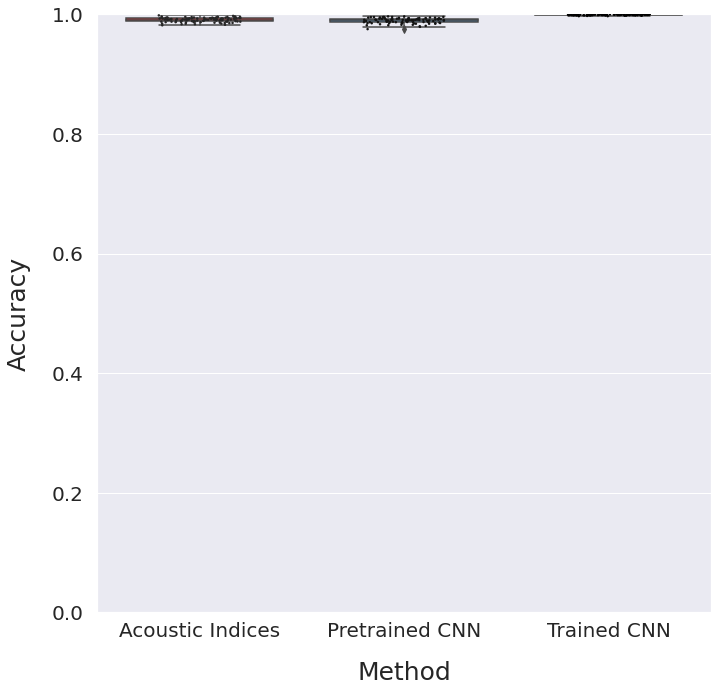

In [ ]:
fig = plt.figure(figsize=(11, 11))

# make boxplots
ax = sns.boxplot(x="Method", y="Accuracy", hue="Method", data=df, palette="Set1", width=0.8, dodge = False)
adjust_box_widths(fig, 0.9)

# add individual datapoints
ax = sns.stripplot(x="Method", y="Accuracy", data=df, color="black", jitter=0.2, size=2.5, hue="Method", dodge = False)

# Get the handles and labels.
#handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first three elements, so the stripplot points don't get a legend too
#l = plt.legend(handles[0:3], labels[0:3], prop={'size': 15})
plt.legend([],[], frameon=False)
plt.ylim(0, 1)
plt.xlabel('Method', size = 25, labelpad=20)
plt.ylabel('Accuracy', size = 25,labelpad=20)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.show()
